In [ ]:
import tensorflow as tf  
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.config.list_physical_devices('GPU')

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

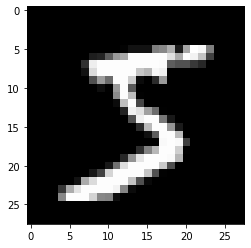

In [48]:
plt.imshow(x_train[0], cmap="gray")

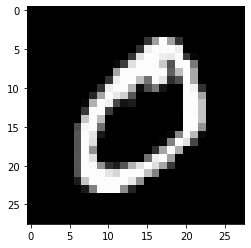

In [49]:
plt.imshow(x_train[1], cmap="gray")

In [50]:
x_train[0].shape

(28, 28)

In [16]:
encoder_input = keras.Input(shape=(28, 28, 1), name = 'img')
x = keras.layers.Flatten()(encoder_input)　　　# Here we are flattening to 784
encoder_output = keras.layers.Dense(64, activation='relu')(x)

encoder = keras.Model(encoder_input, encoder_output, name = 'encoder')

decoder_input = keras.layers.Dense(784, activation='relu')(encoder_output)
decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_input)

opt = keras.optimizers.Adam(learning_rate= 0.001, decay = 1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name = 'autoencoder')
autoencoder.summary()
autoencoder.compile(opt, loss = "mse")

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [18]:
autoencoder.fit(x_train, x_train,epochs = 3, batch_size = 32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0285 - val_loss: 0.0121
Epoch 2/3
1688/1688 [==============================] - 2s 922us/step - loss: 0.0118 - val_loss: 0.0115
Epoch 3/3
1688/1688 [==============================] - 1s 875us/step - loss: 0.0113 - val_loss: 0.0111


In [19]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]
print(example)

[2.203375   0.36527053 0.         1.4733222  0.54362035 1.1015224
 1.1005695  1.4060476  0.20628417 1.7814513  0.419723   0.45870817
 1.2243696  0.63999826 0.39011097 1.0532317  1.6676443  1.0981337
 0.6223765  0.9855244  2.0970025  0.         0.68458897 0.49277562
 0.91789615 0.5190428  0.32612276 0.25465462 2.4122944  1.9667401
 0.42930007 0.         0.4296584  3.2692902  0.8560264  0.34731123
 0.         0.         0.92166203 1.8624287  0.863165   1.5334841
 0.         0.8307968  0.23249012 0.6387175  1.0156462  1.032423
 0.7880706  0.5772455  1.6638511  0.8921094  0.17949916 0.9017093
 2.869261   1.002589   1.4261937  0.         0.6758721  0.31531623
 1.4838654  2.0690913  0.1705521  0.5781714 ]


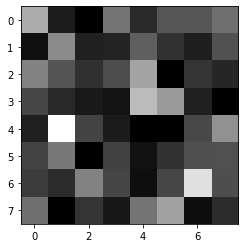

In [31]:
plt.imshow(example.reshape((8,8)), cmap='gray')

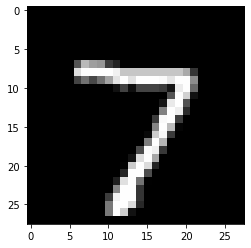

In [26]:
plt.imshow(x_test[0], cmap='gray')

In [27]:
ae_out = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]

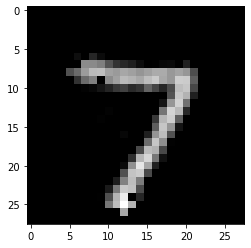

In [28]:
plt.imshow(ae_out, cmap= 'gray')

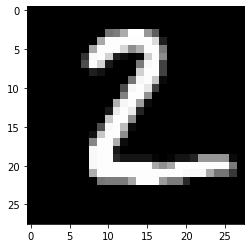

In [34]:
plt.imshow(x_test[1], cmap='gray')

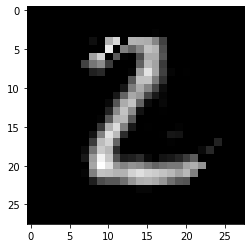

In [35]:
ae_out = autoencoder.predict([x_test[1].reshape(-1, 28, 28, 1)])[0]
plt.imshow(ae_out, cmap= 'gray')

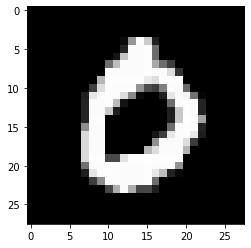

In [36]:
plt.imshow(x_test[3], cmap='gray')

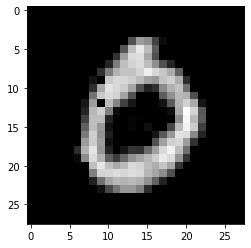

In [37]:
ae_out = autoencoder.predict([x_test[3].reshape(-1, 28, 28, 1)])[0]
plt.imshow(ae_out, cmap= 'gray')

## Adding Noise and trying to remove in the decoder

In [41]:
import random
def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row :
            if random.choice(range(100)) <= random_chance:
                new_val = random.uniform(0, 1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

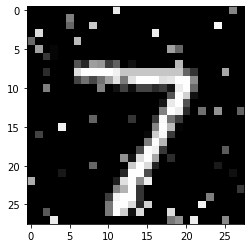

In [42]:
noisy = add_noise(x_test[0])
plt.imshow(noisy, cmap="gray")

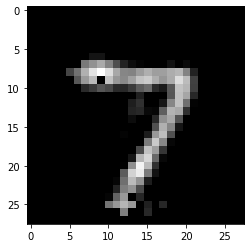

In [43]:
ae_out = autoencoder.predict(noisy.reshape(-1, 28, 28, 1))[0]
plt.imshow(ae_out, cmap='gray')

# OPENCV compression using Resize

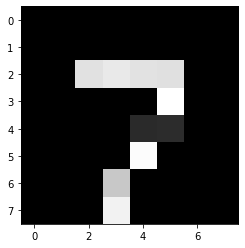

In [44]:
smaller = cv2.resize(x_test[0], (8,8))
back_to_original = cv2.resize(smaller, (28,28))
plt.imshow(smaller, cmap="gray")

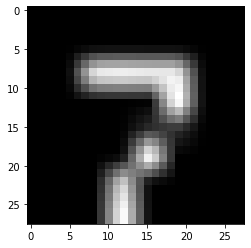

In [45]:
plt.imshow(back_to_original, cmap="gray")

In [4]:
64 /(28*28)

0.08163265306122448